<center><h3> Домашнее задание 5: Метод главных компонент для визуализации
данных </h3></center>

In [541]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Выберем признаки, которые относятся к одному аспекту: уровню продаж в различных регионах мира.

In [542]:
data = pd.read_csv("games.csv")
data = data.set_index("Name")
data.index.name = None
data.drop(columns=["Rank", "Platform", "Year", "Genre", "Publisher", "Global_Sales"], inplace=True)
data

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Wii Sports,41.49,29.02,3.77,8.46
Super Mario Bros.,29.08,3.58,6.81,0.77
Mario Kart Wii,15.85,12.88,3.79,3.31
Wii Sports Resort,15.75,11.01,3.28,2.96
Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00
...,...,...,...,...
Crash Bandicoot 2: Cortex Strikes Back,3.78,2.17,1.31,0.31
Super Mario Bros. 2,5.39,1.18,0.70,0.19
Super Smash Bros. for Wii U and 3DS,3.24,1.35,2.42,0.43
Call of Duty: World at War,4.79,1.90,0.00,0.69


In [543]:
mean = np.mean(data.values, axis=0)
std = np.std(data.values, axis=0)
rng = np.ptp(data.values, axis=0)

In [544]:
X_zscore = (data - data.mean()) / data.std() # Z-scoring
X_range = (data - data.mean()) / (data.max() - data.min()) # range normalization

__МГК для данных, стандартизированных с помощью z-scoring:__

In [545]:
uz, sz, vhz = np.linalg.svd(X_zscore)

Посчитаем разброс данных:

In [546]:
data_scatter = np.sum((X_zscore**2).values)
data_scatter

396.0000000000001

Найдём вклад каждой компоненты:

In [547]:
contributions = sz**2 / data_scatter
contributions.round(2)

array([0.51, 0.26, 0.14, 0.09])

Видим, что две компоненты покрывают 77% разброса данных

In [548]:
uz0 = -uz[:, 0]
vhz0 = -vhz[0]
vhz1 = vhz[1]
uz1 = uz[:, 1]

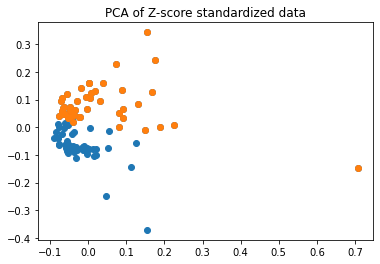

In [549]:
plt.scatter(uz0, uz1)
plt.scatter(uz0[X_zscore.iloc[:, 2].values > 0], uz1[X_zscore.iloc[:, 2].values > 0])
plt.title('PCA of Z-score standardized data')
plt.show()

Мы выделили группы объектов (выбрали 3 признак), у которых в Японии продажи были выше среднео и ниже среднего. Видим, что объекты сильно отделяются по первой компоненте: снизу игры, которые имели плохой спрос в США, Европе. Снизу игры, которые пользовались высоким спросом в Японии.

По остальным признакам нет такого чёткого разделения, там принимают участие обе компоненты.

In [550]:
print(vhz0)
print(vhz1)

[0.56571236 0.61109363 0.27313575 0.48159211]
[ 0.08056873 -0.03199336  0.84240935 -0.53181914]


Интерпретация: 

1-ая главная компонента показывает игры, имеющие успешные продажи в США, Европе и других регионах (не включающие Японию). Можно назвать это уровнем европеизированности игры.

2-ая главная компонента показывает игры, которые пользуются популярностью в Японии, но почти не имеют успеха в Европе и других регионах. Соответственно, она показывает уровень подготовленности игры к японскому рынку или же азиатские игры. 

__МГК для данных, стандартизированных размахом:__

In [551]:
ur, sr, vhr = np.linalg.svd(X_range)
data_scatter = np.sum((X_range**2).values)
contributions = sr**2 / data_scatter
contributions.round(2)

array([0.48, 0.33, 0.13, 0.06])

В этом случае две главные компоненты покрывают 81% разброса данных

In [552]:
print(-vhr[0])
print(vhr[1])

[0.43545209 0.35902739 0.79247141 0.23123553]
[ 0.38307404  0.34592079 -0.55705252  0.65060401]


В данном случае 1-ая компонента показывает игры, у которых везде относительно успешные продажи, но при этом они пользуются в Японии большим спросом. То есть, эта компонента является уровнем лояльности японцев к игре.

2-ая компонента показывает игры, которые пользуются спросом в США, Европе (и других регионах), но не пользуются спросом в Японии. Можно снова это назвать уровнем европеизированности игры или подготовленности игры к европейскому рынку.

In [553]:
ur0 = -ur[:, 0]
ur1 = ur[:, 1]

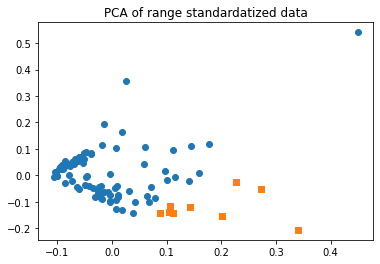

In [554]:
plt.scatter(ur0, ur1)
plt.scatter(ur0[X_range.iloc[:, 2].values > 0.3], ur1[X_range.iloc[:, 2].values > 0.3], marker='s')
plt.title("PCA of range standardatized data")
plt.show()

На данном примере квадратами выделены игры, которые имели повышенный спрос в Японии. Объекты разделены наклонной прямой, то есть здесь принимали участие обе главные компоненты: первая показывала повышенную популярность в Японии, вторая указывала на присутствие/отсутствие неуспеха в Японии.

__Традиционный метод МГК__

In [555]:
N = X_zscore.shape[0]

In [556]:
cov = np.dot(X_zscore.T, X_zscore) / N
eigw, eigv = np.linalg.eig(cov)
eigw

array([2.02374141, 0.37215205, 0.53487716, 1.02922937])

Первое собственное значение самое большое, поэтому возьмём первый вектор:

In [557]:
pca0 = np.dot(X_zscore, eigv[:, 0]) / np.sqrt(N * eigw[0])

In [558]:
cov = cov - eigw[0] * eigv[:, 0][:, None] * eigv[:, 0]
eigw, eigv = np.linalg.eig(cov)
eigw

array([-1.33226763e-15,  1.02922937e+00,  5.34877160e-01,  3.72152052e-01])

Второе собственное значение максимальное, так что теперь возьмём второй вектор для поиска следующей главной компоненты:

In [559]:
pca1 = np.dot(X_zscore, -eigv[:, 1]) / np.sqrt(N * eigw[1])

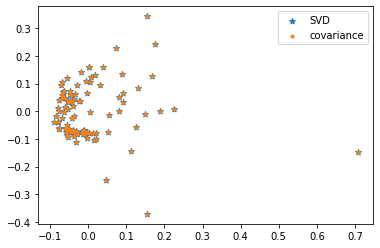

In [560]:
plt.scatter(uz0, uz1, marker='*', label='SVD')
plt.scatter(pca0, pca1, marker='.', label='covariance')
plt.legend()
plt.show()

Видим, что результаты методов совпали: массивы одинаковые, на каждую звёздочку попадает точка.